This notebook is to run the best models trained on the test set, and to produce useful visualizations of these models' performance. We'll test two models here, one from the file RCNN_Model_advancedTraining_1, and another from RCNN_Model_advancedTraining_2. 

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module, rnn_2dCNN
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC, plotConfusion
from imageNumber_analysis import num_valAcc 
from learn_rate_optimize import filters_optimize, lr_optimize, lr_filters_optimize
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# network parameter dimensions 
layer0_params = [32, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1] # ---> Downsampling with one filter at the end

layer1_params = [32, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1] # ---> Downsampling with one filter 

layer2_params = [32, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1] # ---> downsampling with one filter 

rnn_params = [18, 18, 1]

layer3_params = [32, 3, 3, 1, 1]

fc_params = [18, 150, 100, 50, 3, 0.5]

In [5]:
batch_size = 1000
loader_train, loader_val, loader_test = getDataLoaders(batch_size=batch_size)

In [9]:
# initialize and load the models 
final_one = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

final_two = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

final_one.load_state_dict(torch.load("../models/advTraining_1_2.pth.tar"))
final_two.load_state_dict(torch.load("../models/advTraining_smLR_2_BEST.pth.tar"))

"""
final_one = torch.load("../models/advTraining_1_2.pth.tar")
final_two = torch.load("../models/advTraining_smLR_2_BEST.pth.tar")
"""

'\nfinal_one = torch.load("../models/advTraining_1_2.pth.tar")\nfinal_two = torch.load("../models/advTraining_smLR_2_BEST.pth.tar")\n'

In [10]:
# evaluate the two models on the test set 
test_acc_one = check_accuracy(loader_test, final_one, returnAcc=True)
test_acc_two = check_accuracy(loader_test, final_two, returnAcc=True)

cuda
Got 70144 / 90000 correct (77.94)
cuda
Got 69832 / 90000 correct (77.59)


Next, let's plot ROC curves for each model. 

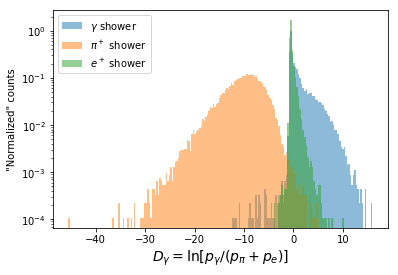

../plottingFcts.py:229: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


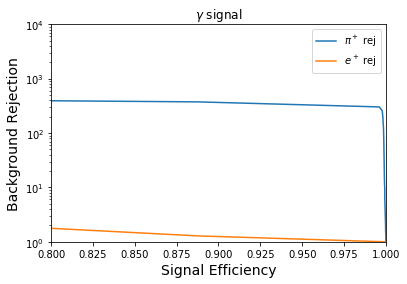

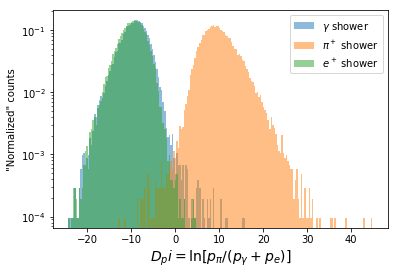

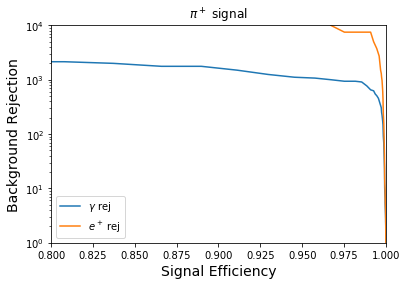

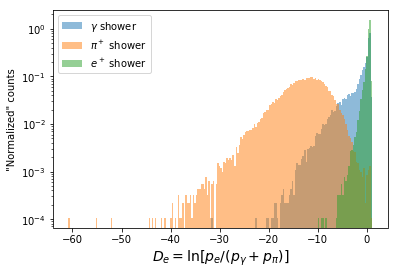

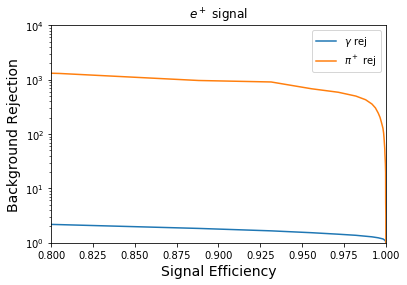

In [11]:
# ROC curves for model one

for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(final_one, loader_test, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')

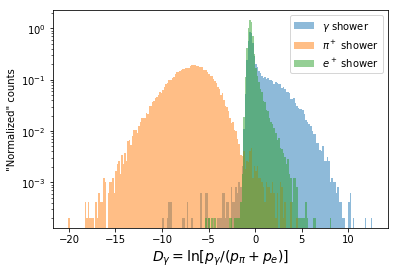

../plottingFcts.py:229: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


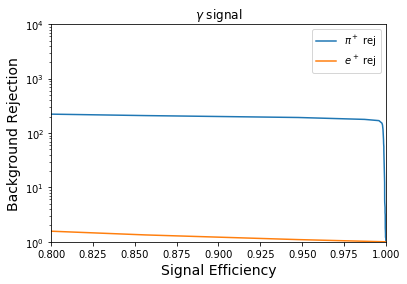

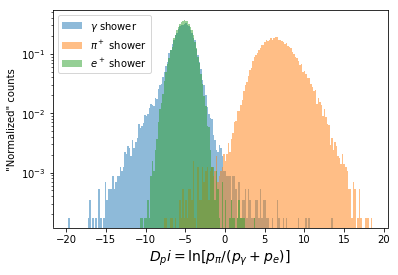

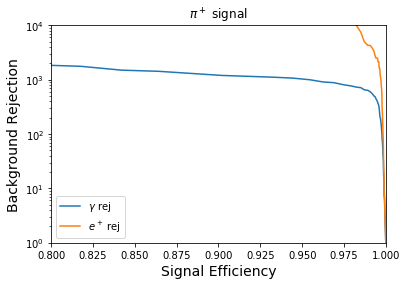

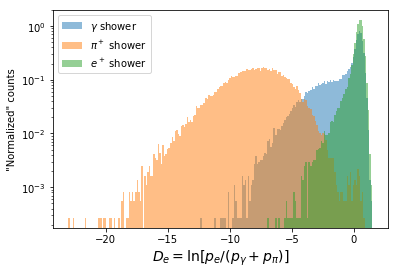

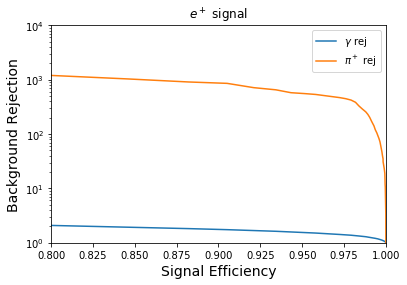

In [12]:
# ROC curves for model two 

for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(final_two, loader_test, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')

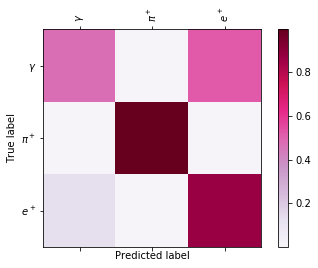

In [14]:
# confusion matrix plots 
plotConfusion(final_one, loader_test)

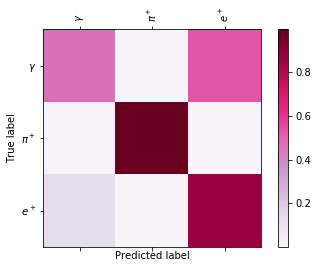

In [15]:
plotConfusion(final_two, loader_test)